
#  Using merge_asof() to create dataset

##  Assignment 

The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you.

##  Pre exercise code 

```
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

fn_gdp = 'https://assets.datacamp.com/production/repositories/5486/datasets/81535f55bf9c8bf75855e6bc02c08307424b1694/gdp_fred.p'
fn_rec = 'https://assets.datacamp.com/production/repositories/5486/datasets/0482a2c2d474e1603f640ecb7229e69ae0c6286a/recession.p'

gdp = load(urllib.request.urlopen(fn_gdp))
recession = load(urllib.request.urlopen(fn_rec))
```



##  Instructions 

- Using `merge_asof()`, merge `gdp` and `recession` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.
- Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.
- Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.


In [56]:
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

gdp = pd.read_pickle("gdp_fred.p")
recession = pd.read_pickle("recession.p")

In [57]:
gdp.head(1)

,date,gdp
0,1979-01-01,2526.61


In [58]:
recession.head(1)

,date,econ_status
0,1980-01-01,recession


In [59]:
gdp_recession = pd.merge_asof(gdp, recession, on="date")

In [63]:
gdp_recession.head(1)

,date,gdp,econ_status
0,1979-01-01,2526.61,NaN


In [64]:
is_recession = ['r' if stat == "recession" else 'g' for stat in gdp_recession["econ_status"]]

<Axes: xlabel='date'>

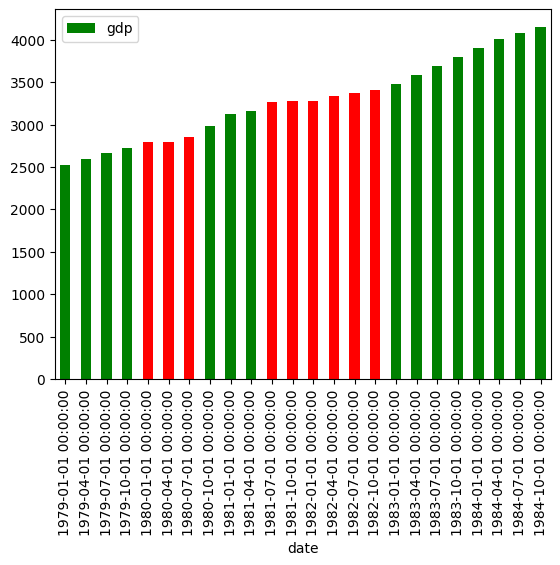

In [66]:
gdp_recession.plot(kind="bar", x="date", y="gdp", color=is_recession)